# Tecniche di previsione delle serie temporali
Il forecasting nelle time series (serie temporali) è il processo di previsione dei valori futuri di una variabile basandosi sui suoi valori passati, osservati a intervalli di tempo regolari.

## Definizione formale
> Il forecasting è una tecnica statistica e/o algoritmica che utilizza i dati storici di una serie temporale per stimare i valori futuri della stessa variabile, tenendo conto di pattern come trend, stagionalità, ciclicità e rumore.

## Obiettivi
* Prevedere il valore della variabile al tempo t+h, dove h è l’orizzonte di previsione.
* Supportare decisioni in ambito economico, industriale, ambientale, medico, ecc.

## Caratteristiche principali delle serie temporali utili al forecasting
* **Trend:** andamento crescente o decrescente nel lungo periodo.
* **Stagionalità:** pattern che si ripete a intervalli regolari (es. vendite natalizie).
* **Ciclicità:** variazioni a lungo termine non necessariamente regolari.
* **Rumore:** componente casuale imprevedibile.

In [1]:
# temperature media a San Francisco

import pandas as pd
import statsmodels.api as sm


df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/sf-temps.csv")

df['date'] = pd.to_datetime(df['date']) # date viene convertita in tipo datetime 
df.set_index('date', inplace=True) # date diventa indice DF


# calcoliamo la temperatura media mensile
monthly_avg_temp = df.resample('M').mean() #raggruppo mensilmente, calcolo media
                                           # nuovo DF con un riga per ogni mese e la media mese
monthly_avg_temp = monthly_avg_temp.diff() # diff tra valore di un mese e quello precedente
monthly_avg_temp = monthly_avg_temp.dropna() # elimino i nulli 
monthly_avg_temp.head()


/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_83339/593871020.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df.resample('M').mean() #set frequenza mese


,temp
date,
2010-02-28,2.259759
2010-03-31,1.712629
2010-04-30,1.676528
2010-05-31,2.337912
2010-06-30,2.473754


In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the Vega dataset
df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/sf-temps.csv")

# Set the date as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# calcoliamo la temperatura media mensile
monthly_avg_temp = df.resample('M').mean() #set frequenza mese
# monthly_avg_temp = monthly_avg_temp.diff()
# monthly_avg_temp = monthly_avg_temp.dropna()
monthly_avg_temp.head()


/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_83339/51912365.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = df.resample('M').mean() #set frequenza mese


,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968


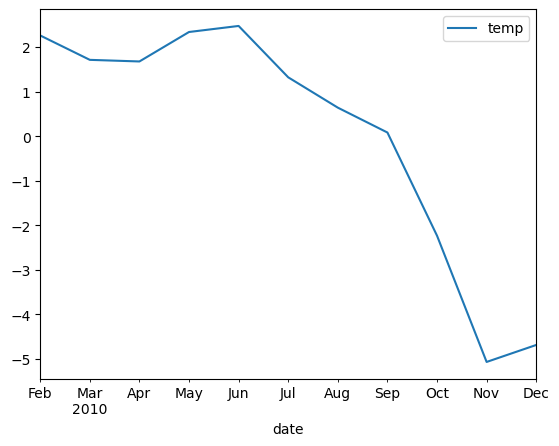

In [3]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/sf-temps.csv")

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

monthly_avg_temp = df.resample('M').mean() 
monthly_avg_temp = monthly_avg_temp.diff()
monthly_avg_temp = monthly_avg_temp.dropna()

monthly_avg_temp.plot()

df = monthly_avg_temp

# Cos'è un modello autoregressivo (AR)?
> ### Un modello autoregressivo è un modello matematico usato per prevedere i valori futuri di una serie temporale basandosi sui suoi valori passati.

### Statistiche
* **coef:** il coefficiente (quanto pesa il valore laggato sulla previsione).
* **std err:** errore standard del coefficiente.
* **t e P>|t|:** valori del test t e il p-value associato (se < 0.05 è statisticamente significativo).
* **R-squared:** quanto bene il modello spiega la variabilità dei dati (0–1).
* **Durbin-Watson:** test per l'autocorrelazione dei residui.
* **Ljung-Box:** test per autocorrelazione dei residui (serve per validazione).

1. Se i coefficienti lag 1 o 2 sono significativi (p-value < 0.05), allora esiste dipendenza temporale, quindi il modello AR ha senso.
2. Se invece sono non significativi, i valori passati non aiutano molto a prevedere quelli futuri (la serie potrebbe essere troppo rumorosa o già differenziata troppo).

In [3]:
from statsmodels.tsa.ar_model import AutoReg

# verifichiamo  che i dati siano appropriati per le analisi

df['temp'] = df['temp'].dropna()  # elimino eventuali NaN in temp

# Costruisco un modello AR(1), cioò il valore corrente è previsto usando solo valore mese precedente
ar_model = AutoReg(df['temp'], lags=1)  
                  
ar_result = ar_model.fit() # Adatto (fit) il modello ai dati, stimando i parametri ottimali.

print(ar_result.summary())


                            AutoReg Model Results                             
Dep. Variable:                   temp   No. Observations:                 8759
Model:                     AutoReg(1)   Log Likelihood              -14213.769
Method:               Conditional MLE   S.D. of innovations              1.226
Date:                Mon, 02 Jun 2025   AIC                          28433.539
Time:                        20:51:47   BIC                          28454.772
Sample:                             1   HQIC                         28440.774
                                 8759                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1606      0.123      9.446      0.000       0.920       1.401
temp.L1        0.9796      0.002    456.501      0.000       0.975       0.984
                                    Roots           

/Users/emilianocitarella/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Cosa dice il modello 
Il modello dice che la temperatura corrente è quasi uguale alla precedente, più un piccolo aumento medio.

È significativo e ben calibrato, ma la non stazionarietà potrebbe influenzare negativamente la qualità delle previsioni a lungo termine.

* `const` > c'è una crescita media di +1.16 unità(a parità di temp.L1)
* `temp.L1` > fortissima dipendenza dal mese precedente(quasi 1 = persistenza quasi perfetta)

> ### Y = 1.1606 + 0.9796 * Yt-1

* Ogni valore della temperatura dipende quasi completamente da quello del mese precedente.
* C’è anche una componente costante di circa 1.16 (può rappresentare una tendenza media all’aumento).

* `AR.1` > la radice caratteristica AR.1 > 1, questo indica che il processo è instabile e non stazionario e questo è coerente perchè stiamo utilizzando dati non differenziati (dati originali giornalieri) che non sono stazionari. 
* `AIC/BIC`> servono per confrontare modelli: più basso è, meglio è (se provi lags=2, puoi confrontare).

# Autoregressive (AR) Models

## Cos'è un Modello AR ?
- Un **modello autoregressivo (AR)** è un tipo di modello statistico utilizzato per la previsione nei dati delle serie temporali.
- Prevede il comportamento futuro in base al comportamento passato.
- Il modello è definito "autoregressivo" perché fa regredire la variabile contro se stessa.

## La formula di un Modello AR 
- Il modello AR è definito come:

$
Y_t = c + x_1 Y_{t-1} + x_2 Y_{t-2} + ... + x_p Y_{t-p} + \epsilon_t$

where,
- $Y_t$ è il valore al momento\( t \),
- $c$ è una costante,
- $x_1, x_2, ..., x_p$ sono i parametri del modello,
- $p$ è l'ordine del modello AR,
- $\epsilon_t$ è l'errore.

## Informazioni Generali
+ **Dep Variable:** La variabile dipendente è `temp`, cioè la serie temporale che si sta modellando.
+ **No. Observations**: Ci sono 1 o più osservazioni totali nella serie temporale.
+ **Model:** Il modello è un AutoRegressivo (AR) con 1 o più ritardi (p=1)
+ **Method:** Il metodo utilizzato è il **Conditional Maximum Likelihood Estimation (MLE)**, che stima i parametri ottimizzando la verosimiglianza condizionata sui primi p valori.
+ **S.D. of Innovations:** La deviazione standard delle innovazioni (errori residui) è variabile . Indica la dispersione degli errori attorno al modello.
+ **Date e Time:** Indicano la data e l'orario in cui il modello è stato calcolato.
+ **Sample:** Indica l'intervallo temporale dei dati utilizzati nel modello: da un giorno ad un altro. 

### Criteri di valutazione del modello
+ **AIC (Akaike Information Criterion):** Più basso è l'AIC, migliore è il modello in termini di bilanciamento tra accuratezza e complessità.
+ **BIC (Bayesian Information Criterion):** Anche qui, un valore più basso indica un modello migliore, ma BIC penalizza maggiormente la complessità rispetto all'AIC.
+ **HQIC (Hannan-Quinn Information Criterion):** Simile ad AIC e BIC, è un altro criterio per valutare il modello.

## Interpretazione Complessiva

### Significatività del modello:
+ Il modello cattura la relazione tra i valori correnti e i valori passati della serie temporale.
+ Capire quale sia il lag (temp.L1) più significativo, se i valori recenti influenzano fortemente il valore corrente.

### Stabilità del modello:
+ Le radici del modello AR mostrano che il modello è stabile?

### Previsione: 
+ Questo modello può essere utilizzato per effettuare previsioni a breve termine, data la sua natura autoregressiva?

### Complessità:
+ I criteri AIC, BIC e HQIC indicano che il modello non è eccessivamente complesso, ma potrebbe migliorare con più dati (il campione è relativamente piccolo)?


## Come determinare se il modello AR è significativo
Per determinare se un modello autoregressivo è significativo, possiamo analizzare il contributo di ciascun lag (termine ritardato) nel modello attraverso i valori di coefficiente `(Temp.L)` e la probabilità associata `p>z`.

### Temp.L (Coefficiente del lag):
Indica l'importanza di un dato lag nella previsione del valore attuale della serie temporale.
Un valore significativo di Temp.L implica che il lag contribuisce in modo rilevante al modello.

### P > ∣z∣ (Valore p associato al coefficiente):
Misura la probabilità che il coefficiente del lag sia statisticamente significativo.
Regola generale:
* P >∣z∣ <0.05: Il lag è statisticamente significativo.
* P >∣z∣ ≥0.05: Il lag non è significativo e potrebbe essere ignorato.

## Varianza dei Lag e Significatività
La varianza dei lag gioca un ruolo importante nell'identificazione dei lag rilevanti. 

1. Bassa Varianza dei Lag
+ I coefficienti dei lag (Temp.L) sono simili tra loro.
+ In questo caso, anche un singolo lag insignificante può influire poco sul modello generale.
+ Azioni:
> Se tutti i lag sono significativi (P<0.05), il modello è affidabile.

2. Alta Varianza dei Lag
+ I coefficienti dei lag mostrano differenze marcate (alcuni sono molto grandi o molto piccoli).
+ Lag con P>∣z∣≥0.05 possono distorcere il modello.
+ Azioni: Rimuovere i lag non significativi per semplificare il modello.
+ Verificare se la rimozione migliora le metriche generali (AIC, BIC, o errore residuo).

# Modello ARMA (Autoregressive Moving Average)
Un modello ARMA è un modello statistico utilizzato per analizzare e prevedere serie temporali stazionarie.
Combina due componenti fondamentali:
1. componente autoregressiva (AR): utilizza i valori passati della serie per prevedere il valore attuale. 
2. media mobile (MA): utilizza gli errori del passato per prevedere il valore attuale. 

### Caratteristiche
* Si applica solo a serie temporali stazionarie (cioè con media e varianza costanti nel tempo).
é Se la serie non è stazionaria, si può differenziare e usare un modello ARIMA, che aggiunge una componente integrata (I = Integrated).

### Quando si usa un ARMA?
* Quando la serie ha un comportamento costante nel tempo (niente trend o stagionalità).
* Quando si vogliono catturare pattern di dipendenza sia nei valori passati (AR) sia negli errori (MA).

# Media Mobile (Moving Average)
La media mobile è una tecnica che consiste nel calcolare la media di un certo numero di valori consecutivi in una serie temporale, e far "scorrere" questa media lungo la serie per ottenere una nuova serie più liscia.

1. Smorza le fluttuazioni casuali (rumore) nei dati.
2. Evidenzia i trend sottostanti in una serie temporale.
3. È una base per modelli più complessi, come la parte MA dei modelli ARMA/ARIMA.

In un modello MA, invece di guardare direttamente i dati stessi (come la temperatura ogni giorno), guardiamo gli "errori" commessi nelle previsioni precedenti.
"Errore" qui significa quanto eravamo fuori nelle nostre previsioni passate. 

Ad esempio, se abbiamo previsto che la temperatura di ieri sarebbe stata di 70°F, ma in realtà era di 72°F, l'errore è di 2°F.
* Il modello MA dice che la migliore previsione per la temperatura di oggi è una combinazione di questi errori passati. Quindi, è come dire: "So di essere stato fuori di alcuni gradi negli ultimi giorni, lasciami usare quelle informazioni per fare un'ipotesi migliore oggi".

# Modelli di media mobile (MA)

## Cos'è un modello MA?

- Un **modello di media mobile (MA)** è un approccio statistico utilizzato per prevedere i dati delle serie temporali.

- Prevede i valori futuri in base agli errori (differenze tra valori effettivi e previsti) delle previsioni passate.

## Come Funziona?

- Invece di utilizzare direttamente i valori passati della serie, il modello MA utilizza gli errori di previsione passati.

- Un errore di previsione è la differenza tra il valore effettivo e il valore previsto in un momento precedente.

## Formulazione del modello

- Il modello MA è definito come:

$Y_t = \mu + ε_t + θ_1 ε_{t-1} + θ_2 ε_{t-2} + ... + θ_q ε_{t-q}$


where,
- $Y_t$ è il valore al momento $t$,
- $\mu$ è la media della serie,
- $ε_t$ è la previsione dell'errore al tempo `t`,
- $θ_1, θ_2, ..., θ_q$ sono i parametri del modello,
- $q$ è l'ordine del modello MA.

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/co2-concentration.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

monthly_avg_co = df.resample('M').mean() # raggruppo i dati per mesi e calcolo media mensile CO2

monthly_avg_co = monthly_avg_co.diff() # DIFF tra un mese ed il precedente
                                       # eliminate eventuale trend lineare, rende la serie stazionaria

/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_83339/2788707242.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_co = df.resample('M').mean() # raggruppo i dati per mesi e calcolo media mensile CO2


<Axes: xlabel='Date'>

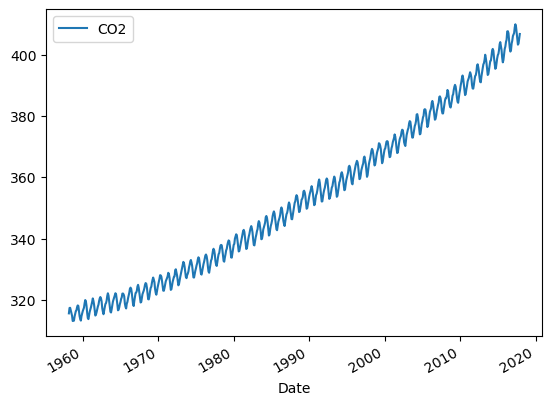

In [7]:
df.plot()

<Axes: xlabel='Date'>

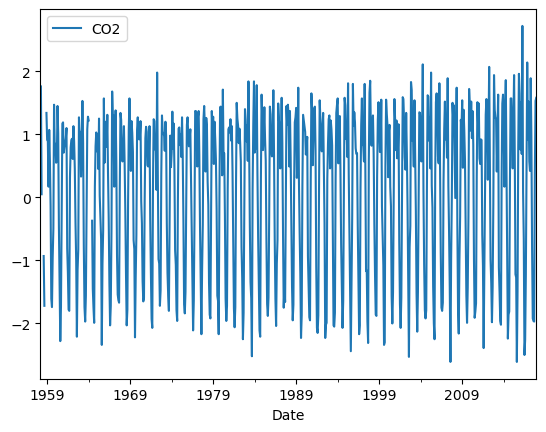

In [8]:
monthly_avg_co.plot()

Applico il modello `ARMA(1,1)` alla serie differenziata delle concentrazioni mensili di CO₂.

`ma_model = sm.tsa.ARIMA(monthly_avg_co['CO2'], order=(1, 0, 1))`
* `ARIMA(1, 0, 1)` significa:
1. `1` componente AR (autoregressiva) → considera l’effetto del mese precedente;
2. `0` differenziazioni → la serie è già differenziata prima, quindi non serve che il modello lo faccia;
3. `1` componente MA (media mobile) → tiene conto dell’errore residuo del mese precedente.

Questo è tecnicamente un modello ARMA(1,1).

#### Adattamento del modello
`ma_result = ma_model.fit()`
1. Stima i parametri AR e MA in base ai dati.
2. Costruisce il modello più adatto per spiegare la dinamica delle variazioni di CO₂.

> ### "La variazione della CO₂ in un certo mese può essere spiegata sia dalla variazione del mese precedente (componente AR), sia dall’errore che ho fatto il mese precedente nella previsione (componente MA)."

In [9]:

ma_model = sm.tsa.ARIMA(monthly_avg_co['CO2'], order=(1, 0, 1))

# order=(AR, DIFF, Ma)
# quante componenti AR vuoi includere? il mese prima influisce? quanto? se si=1
# avevo già differenziato, per cui lascio = 0
# ritieni che MA influisca? =1

ma_result = ma_model.fit()

print(ma_result.summary())

# in questo modo combiniamo AR e MA insieme 

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  718
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -884.455
Date:                Tue, 10 Dec 2024   AIC                           1776.909
Time:                        15:06:28   BIC                           1795.215
Sample:                    03-31-1958   HQIC                          1783.977
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1336      0.099      1.351      0.177      -0.060       0.327
ar.L1          0.5469      0.043     12.862      0.000       0.464       0.630
ma.L1          0.3727      0.048      7.800      0.0

### Parametri stimati 
1. `const`> 0.1336	> Costante di drift (aumento medio)	> 0.177	> Non significativo: potrebbe essere 0
2. `ar.L1` > 0.5469 > Peso del mese precedente > 0.000>  Significativo: la variazione di CO₂ dipende dal valore del mese prima
3. `ma.L1` > 0.3727	> Influenza dell’errore precedente > 0.000 > Significativo: gli "errori" passati influiscono sulle variazioni attuali
4. `sigma2`	> 0.7063 > Varianza degli errori residui> indica la dispersione del modello

### Test diagnostici
* `AIC = 1776.909 / BIC = 1795.215`: più bassi sono questi valori, migliore è il modello (usati per confronto tra modelli).
* `Ljung-Box Q (p = 0.05)`: indica possibile autocorrelazione residua → sarebbe meglio verificarla con un plot dell'ACF dei residui.
* `Jarque-Bera (p = 0.07)`: i residui sono quasi normali, ma non perfettamente.
* `Heteroskedasticity (H = 1.49, p = 0.00)`: gli errori non hanno varianza costante → c'è eteroschedasticità, che potrebbe richiedere un modello più robusto (es. GARCH o SARIMA).

### Cosa significa?
> ### Il modello ARMA(1,1) funziona bene per descrivere le variazioni mensili della CO₂.

La variazione attuale è influenzata:
- positivamente dalla variazione del mese precedente (ar.L1 = 0.5469) e dagli errori di previsione precedenti (ma.L1 = 0.3727)
- Il termine costante non è significativo, quindi l’aumento medio mensile potrebbe essere nullo (o molto basso).
- Alcune diagnosi dei residui (eteroschedasticità, autocorrelazione marginale) suggeriscono che il modello non è perfetto, ma comunque valido per una prima previsione.

## Vario AR con 3
Qual è il miglior modello in base all'AIC tra lag 1, 2 o 3?

In [10]:
ma_model = sm.tsa.ARIMA(monthly_avg_co['CO2'], order=(3, 0, 1))
ma_result = ma_model.fit()

print(ma_result.summary())

# verifichiamo effetto su AIC con lag=1, 2 o 3: quale il minore? 
# ar.L1 molto forte significativo
# ar.L2 negativo, significativo
# ar.L3 non significativo 

# 301 migliore di 101

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  718
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -720.107
Date:                Mon, 02 Jun 2025   AIC                           1452.215
Time:                        21:58:47   BIC                           1479.674
Sample:                    03-31-1958   HQIC                          1462.817
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1324      0.008     15.594      0.000       0.116       0.149
ar.L1          1.5130      0.046     32.637      0.000       1.422       1.604
ar.L2         -0.7966      0.078    -10.267      0.0

In [11]:
from statsmodels.tsa.arima.model import ARIMA

aic_results = []

for p in [1, 2, 3]:
    model = ARIMA(monthly_avg_co['CO2'], order=(p, 0, 1))
    result = model.fit()
    aic_results.append((p, result.aic))
    print(f"ARIMA({p},0,1) AIC: {result.aic:.2f}")

# Mostra il migliore
best = min(aic_results, key=lambda x: x[1])
print(f"\n✅ Miglior modello secondo AIC: ARIMA({best[0]},0,1) con AIC = {best[1]:.2f}")


ARIMA(1,0,1) AIC: 1776.91
ARIMA(2,0,1) AIC: 1450.81
ARIMA(3,0,1) AIC: 1452.21

✅ Miglior modello secondo AIC: ARIMA(2,0,1) con AIC = 1450.81


# Modello ARIMA (AutoRegressive Integrated Moving Average)

Abbiamo comprenso che il modello ARIMA è uno dei più popolari per l'analisi e la previsione delle serie temporali.

Combina tre componenti principali:
1. **AR (AutoRegressive): **
+ Modella la dipendenza tra un valore della serie e i suoi valori passati (lag).
+ Governato dal parametro p: il numero di lag autoregressivi.

2. **I (Integrated):**
+ Rappresenta il numero di differenziazioni (Δ) necessarie per rendere la serie stazionaria.
+ Governato dal parametro d: il grado di differenziazione.

3. **MA (Moving Average):**
+ Modella la dipendenza tra un valore della serie e i residui di errori passati.
+ Governato dal parametro q: il numero di termini di media mobile.


1. **Dep. Variable:**
+ Variabile dipendente (serie temporale analizzata).
+ Model: Specifica il modello (ad esempio, ARIMA(1,1,1)).
+ Date: Data e ora di esecuzione del modello.
+ Sample: Intervallo temporale dei dati utilizzati per stimare il modello.

2. **Parametri del Modello**
+ AR (AutoRegressive):Coefficiente stimato per i termini autoregressivi. Indica quanto i valori passati della serie influenzano il valore attuale.
+ MA (Moving Average):Coefficiente stimato per i termini di media mobile. Indica quanto gli errori passati influenzano il valore attuale.
+ Intercept: Termine costante (se applicabile).

3. **Per ogni parametro:**
+ coef: Coefficiente stimato.
+ std err: Errore standard del coefficiente.
+ z: Statistica z per verificare la significatività del coefficiente.
+ P>|z|:Valore p: misura della significatività statistica. P<0.05: il coefficiente è statisticamente significativo.

4. **Diagnostica Residui**
+ Ljung-Box (Q): Test per verificare l'autocorrelazione dei residui. Un p-value alto indica che i residui non sono autocorrelati (buon segno).
+ Jarque-Bera (JB): Test per verificare se i residui seguono una distribuzione normale. Un p-value alto indica che i residui sono normalmente distribuiti.

5. **Criteri di Informazione**
+ AIC (Akaike Information Criterion): Misura della bontà di adattamento del modello penalizzata per il numero di parametri. Modelli con valori AIC più bassi sono preferibili.
+ BIC (Bayesian Information Criterion): Simile all'AIC, ma con una penalizzazione più severa per modelli complessi.

6. **Performance del Modello**
+ Log-Likelihood: Logaritmo della funzione di verosimiglianza massimizzata. Valori più alti indicano un miglior adattamento.
+ Hannan-Quinn Criterion (HQIC): Simile a AIC/BIC, penalizza la complessità del modello.


# Modelli di media mobile integrata autoregressiva (ARIMA)

Integriamo i modelli: ciò significa che possiamo modellare sia il termine di errore che la media mobile.

In [12]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/co2-concentration.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

monthly_avg_co = df.resample('M').mean()

monthly_avg_co = monthly_avg_co.diff()


/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_83339/1027362375.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_co = df.resample('M').mean()


Eseguiamo un modello `ARMA(1,1)` sulla serie delle variazioni mensili della concentrazione di CO₂ `(monthly_avg_co['CO2'])`, già differenziata manualmente.

Cosa troverai nel riepilogo del modello ARIMA(1, 0, 1)

1. Parametri stimati
Parametro	Spiegazione
const	La media del processo (drift dopo la differenziazione)
ar.L1	Quanto il valore del mese precedente influisce sul valore attuale (componente AR)
ma.L1	Quanto l'errore del mese precedente influisce sul valore attuale (componente MA)
sigma2	Varianza del rumore residuo del modello
Per ogni parametro: coef, std err, z, P>|z|, intervallo di confidenza.
👉 Se p-value < 0.05, il coefficiente è statisticamente significativo.

2. Statistiche globali
Statistica	Significato
Log Likelihood	Quanto bene il modello si adatta ai dati
AIC, BIC, HQIC	Usate per confrontare modelli: più basso è meglio
Ljung-Box (Q)	Verifica se i residui sono autocorrelati (vuoi p > 0.05)
Jarque-Bera (JB)	Verifica se i residui sono normalmente distribuiti
Heteroskedasticity (H)	Testa se la varianza dei residui è costante

In [14]:
import statsmodels.api as sm

ma_model = sm.tsa.ARIMA(monthly_avg_co['CO2'], order=(1, 0, 1))
ma_result = ma_model.fit()

print(ma_result.summary())

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  718
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -884.455
Date:                Mon, 02 Jun 2025   AIC                           1776.909
Time:                        22:20:43   BIC                           1795.215
Sample:                    03-31-1958   HQIC                          1783.977
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1336      0.099      1.351      0.177      -0.060       0.327
ar.L1          0.5469      0.043     12.862      0.000       0.464       0.630
ma.L1          0.3727      0.048      7.800      0.0

1. Struttura del modello
* ARIMA(1, 0, 1) > AR(1) + MA(1), senza differenziazione interna
* Osservazioni > 718 (mensili, 1958–2017)
* Covariance > opg (Outer Product of Gradients)

2. Coefficienti stimati
* const	0.1336	0.177	Non significativo → il drift (crescita media) può essere nullo
* ar.L1	0.5469	0.000	Significativo → la variazione di CO₂ dipende dal mese precedente
* ma.L1	0.3727	0.000	Significativo → anche l’errore passato influisce
* sigma2	0.7063	0.000	Varianza degli errori → misura la dispersione residua

Modello valido: i termini AR e MA sono entrambi significativi.

3. Statistiche globali
* AIC	1776.91	Indice di bontà del modello (più basso = meglio)
* BIC	1795.22	Come AIC, ma penalizza di più la complessità
* HQIC	1783.98	Alternativa a AIC e BIC
* Log Likelihood	-884.46	Misura di adattamento del modello

AIC più alto rispetto ad ARIMA(3,0,1) (che aveva AIC ≈ 1452) → peggiore.

4. Test diagnostici sui residui
* Ljung-Box (Q)	3.79 (p = 0.05)	Marginale autocorrelazione residua
* Jarque-Bera	5.42 (p = 0.07)	Quasi normale, ma non perfettamente
* Heteroskedasticity (H)	1.49 (p = 0.00)	Varianza dei residui non costante (eteroschedasticità)

* I residui non sono perfetti, ma il modello è comunque accettabile.
* Modello ARIMA(1,0,1) è semplice e i suoi coefficienti principali sono significativi.
* AIC alto rispetto ad ARIMA(3,0,1) → meno efficace in termini di adattamento.
* Alcuni test sui residui indicano possibili miglioramenti (varianza non costante, residui non del tutto normali).

# Stagionale ARIMA (SARIMA)
Il modello SARIMA (Seasonal ARIMA) è un’estensione del modello ARIMA che permette di modellare anche la stagionalità nelle serie temporali.

> ### SARIMA = ARIMA + componente stagionale.

1. Il modello ARIMA è adatto a serie non stagionali.
2. Il SARIMA invece gestisce anche i pattern che si ripetono regolarmente, come:
* vendite natalizie,
* temperature estive/invernali,
* concentrazione di CO₂ durante l’anno.

#### Quando usare SARIMA?
Si utilizza se:
* la serie mostra stagionalità regolare (es. cicli mensili, trimestrali, settimanali),
* abbiamo già provato ARIMA ma rimangono pattern periodici,
* vogliamo previsioni più realistiche per fenomeni stagionali.

#### SARIMA(p, d, q)(P, D, Q, s)
Dove:
* p = ordine dell'autoregressione (AR)
* d = numero di differenziazioni non stagionali
* q = ordine della media mobile (MA)
* P = ordine della componente autoregressiva stagionale
* D = numero di differenziazioni stagionali
* Q = ordine della componente media mobile stagionale
* s = periodicità della stagione (es. 12 per dati mensili → 1 anno)

In [18]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("https://raw.githubusercontent.com/stanfordnlp/plot-interface/master/public/data/co2-concentration.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ricampionare alla media mensile e prendere la prima differenza 
#per renderla stazionaria
monthly_avg_co = df.resample('M').mean()
monthly_avg_co_diff = monthly_avg_co.diff().dropna()

/var/folders/11/02ps53796pncj4x4b53sr7nw0000gn/T/ipykernel_83339/394107661.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_co = df.resample('M').mean()


<Axes: xlabel='Date'>

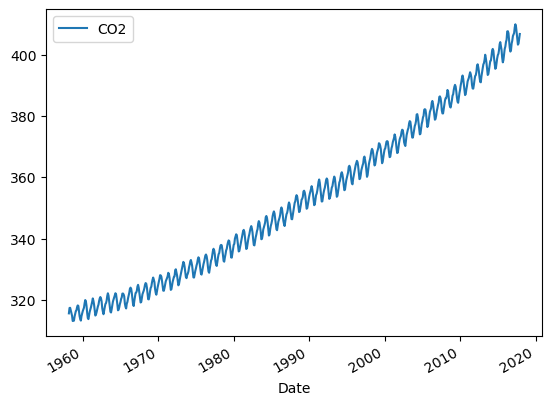

In [19]:
df.plot()

In [17]:
# modifichiamo p, d, q e i parametri seasonal_order secondo necessità
# esempio per i parametri: p=1, d=1, q=1 for the non-seasonal part; 
# P=1, D=1, Q=1, s=12 for the seasonal part (assuming yearly seasonality)

model = sm.tsa.SARIMAX(monthly_avg_co_diff, 
                       order=(2, 1, 1), # arima: 2 componenti AR, DIFF adesso=1, MA=1
                       seasonal_order=(1, 1, 1, 12))

sarima_result = model.fit()

print(sarima_result.summary())


/Users/emilianocitarella/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/emilianocitarella/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80970D-01    |proj g|=  3.28873D-01

At iterate    5    f=  7.33444D-01    |proj g|=  4.45706D-02

At iterate   10    f=  7.26392D-01    |proj g|=  7.41950D-02

At iterate   15    f=  7.17299D-01    |proj g|=  1.18600D-02

At iterate   20    f=  7.10925D-01    |proj g|=  1.26657D-02

At iterate   25    f=  7.05530D-01    |proj g|=  9.72681D-03

At iterate   30    f=  7.04907D-01    |proj g|=  5.17351D-03

At iterate   35    f=  7.04823D-01    |proj g|=  1.77653D-03

At iterate   40    f=  7.04819D-01    |proj g|=  1.65079D-03

At iterate   45    f=  7.04819D-01    |proj g|=  1.01804D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

#### Modello SARIMA(2, 1, 1)(1, 1, 1, 12):
1. Componente **non stagionale**:
- AR(2): dipendenza da 2 mesi precedenti
- I(1): differenziazione per rimuovere trend
- MA(1): media mobile dell’errore del mese prima
2. Componente stagionale (annuale):
- AR(1) stagionale
- I(1) stagionale (differenza a distanza 12)
- MA(1) stagionale
- s=12: periodicità annuale (dati mensili)


#### Coefficiente e significatività
- ar.L1	0.1424	0.000	Significativo: il mese precedente ha impatto
- ar.L2	0.0312	0.184	Non significativo: il secondo mese prima può essere eliminato
- ma.L1	-0.9994	0.000	Molto forte effetto MA
- ar.S.L12	0.1443	0.008	Significativo: c'è memoria stagionale a 12 mesi
- ma.S.L12	-0.6340	0.000	Significativo: effetto errore stagionale
- sigma²	0.2420	0.000	Bassa varianza residua: buon adattamento

#### Metriche di performance
+ Log Likelihood	-499.717	Migliore è più alto (meno negativo)
+ AIC	1011.433    Molto più basso rispetto a modelli ARIMA precedenti (es. AIC ≈ 1450–1770)
+ BIC	1038.705	Per confronto tra modelli con più parametri
+ HQIC	1021.978	Come AIC, meno penalizzante
> L'AIC basso conferma che questo è il modello migliore finora testato.
 
#### Diagnostica residui
* Ljung-Box Q (p=0.38)	✔️ Nessuna autocorrelazione nei residui	
* Jarque-Bera p=0.00	❌ Residui non normali	
* Heteroskedasticity H=0.43 (p=0.00)	❌ Residui con varianza non costante (eteroschedasticità)	

Anche se i residui non sono perfettamente normali o omoscedastici, il modello è valido dal punto di vista predittivo e strutturale.

#### Conclusione finale
Il modello SARIMA(2,1,1)(1,1,1,12):
1. Gestisce trend e stagionalità correttamente.
2. Ha parametri principali significativi.
3. Raggiunge un AIC minimo finora.
4. Ha residui non autocorrelati, quindi ben calibrato.
5. Può essere migliorato rimuovendo ar.L2, non significativo.

# L'algoritmo L-BFGS-B
L-BFGS-B è un algoritmo di ottimizzazione usato per trovare i valori migliori dei parametri in un modello (es. ARIMA, SARIMA), cioè quelli che minimizzano l’errore.

> Immagina di voler trovare il punto più basso in una vallata (cioè l’errore minimo del modello).
L-BFGS-B è un metodo intelligente che scende nella valle facendo piccoli passi, ma usando la pendenza per capire dove andare.

* L = Limited-memory → usa pochi dati alla volta, quindi va bene per problemi con molti parametri (come i modelli statistici).
* BFGS = è una versione veloce e precisa di un algoritmo che approssima la curvatura della funzione (cioè quanto cambia la pendenza).
* B = Bounded → può lavorare anche se metti dei limiti ai valori (es. "questo parametro deve restare positivo").

Le iterazioni e i dettagli dell'ottimizzazione sono riportati nella prima parte.

1. **Iterazioni:**
+ L'algoritmo si è fermato dopo 47 iterazioni.
+ Ad ogni iterazione, il valore della funzione obiettivo (f) viene ridotto, indicando che l'algoritmo sta convergendo verso il minimo.
2. **Gradiente Proiettato (∣projg∣):**
+ Misura della pendenza della funzione obiettivo. Diminuisce durante le iterazioni, segnalando che l'ottimizzazione sta raggiungendo un punto stazionario.
3. **Convergenza:**
+ Messaggio finale: "CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH".
+ L'algoritmo si è fermato perché la riduzione relativa del valore della funzione obiettivo è diventata inferiore a una soglia predefinita, indicando che il minimo è stato trovato.